In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data
/content
done


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
training_set = pd.read_csv('/content/drive/My Drive/Neural_Competition/PHASE-2/TrainAnnotationsWithAugmentation.csv')

In [0]:
training_set = training_set.sort_values(by=['file_name'])

In [5]:
training_set['annotation'].value_counts()

3    524
2    520
4    497
1    489
0    488
Name: annotation, dtype: int64

In [0]:
def getAnnotations(dataFrame):
    temp = {}
    for index, row in dataFrame.iterrows():
        temp[row["file_name"].split(".")[0]] = row["annotation"]
    return temp
#annotaion dictionary to get the annotation of an image while forming the labels list for train and validation sets
annotationsDict = getAnnotations(training_set)

In [0]:
image_dimension = (224, 224)

In [0]:
# train_files, validation_files = train_test_split(glob.glob('/content/drive/My Drive/Neural_Competition/PHASE-2/TrainDataWithAugmentation/*'))
train_files = glob.glob('/content/drive/My Drive/Neural_Competition/PHASE-2/TrainDataWithAugmentation/*')

In [21]:
def getDistribution(dataList):
  distribution = {}
  for item in dataList:
    name = item.split("/")[-1].split(".")[0]
    label = annotationsDict[name]
    distribution[label] = distribution.get(label, 0) + 1
  return distribution


print("Train Distribution = ", getDistribution(train_files))

Train Distribution =  {0: 488, 3: 524, 4: 497, 1: 489, 2: 520}


In [22]:
train_files[0]

'/content/drive/My Drive/Neural_Competition/PHASE-2/TrainDataWithAugmentation/014443.jpg'

In [0]:
def getImageDataAsArrayWithLabels(data):
    imageArrayWithLablesDict = {}
    for i in range(len(data)):
        print("i = ", i)
        
        label = data[i].split('/')[-1].split('.')[0].strip()
        tempImageArr = img_to_array(load_img(data[i], target_size=image_dimension))
        
        imageArrayWithLablesDict[label] = tempImageArr
    return imageArrayWithLablesDict

In [24]:
imageLabelToArrayMapper = getImageDataAsArrayWithLabels(train_files)

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99
i =  100
i =  101
i =  102
i =  103
i =  104
i =  105
i =  106
i =  107
i =  108
i =  109
i =  110
i =  111
i =  112
i =  113
i =  114
i =  115
i =  116
i =  117
i =  118
i =  119
i =  120
i =  121
i =  122
i =

In [0]:
train_labels, validation_labels = train_test_split(list(imageLabelToArrayMapper.keys()))
# train_labels = list(imageLabelToArrayMapper.keys())
# validation_labels = list(imageLabelToArrayMapper.keys())
# train_labels = getImageDataAsArrayWithLabels(train_files)
# validation_imgs = getImageDataAsArray(validation_files)

In [0]:
def getImagesAsNpArray(dataLabels):
  tempArray = []
  for image in dataLabels:
    tempArray.append(imageLabelToArrayMapper[image])
  return np.array(tempArray)

In [27]:
train_imgs = getImagesAsNpArray(train_labels)
validation_imgs = getImagesAsNpArray(validation_labels)


# train_imgs = np.array(train_imgs)
# train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]

# validation_imgs = np.array(validation_imgs)
# validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (1888, 224, 224, 3) 	Validation dataset shape: (630, 224, 224, 3)


In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [0]:
batch_size = 32
num_classes = 5
epochs = 56
input_shape = (224, 224, 3)

In [0]:
# train_labels = list(imageLabelToArrayMapper.keys())
# validation_labels = list(imageLabelToArrayMapper.keys())

In [0]:
# train_labels.sort()
# print(train_labels)

In [0]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

def getDataLabels(data):
    x = []
    temp = []
    for image in data:
        temp.append(annotationsDict[image])
    # define example
    x = temp[:]
    temp = array(temp)
    # one hot encode
    return x, to_categorical(temp)

In [33]:
validation_labels_enc = getDataLabels(validation_labels)
train_labels_enc = getDataLabels(train_labels)

print(train_labels[0:1], train_labels_enc[0:1])

['010739'] [[1. 0. 0. 0. 0.]]


In [0]:
one, two = getDataLabels(validation_labels)

In [57]:
list(one)

[2,
 4,
 3,
 4,
 0,
 3,
 0,
 3,
 2,
 1,
 1,
 4,
 4,
 2,
 1,
 0,
 4,
 4,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 3,
 0,
 2,
 1,
 3,
 0,
 1,
 3,
 1,
 0,
 4,
 2,
 0,
 4,
 0,
 1,
 4,
 4,
 1,
 3,
 2,
 1,
 4,
 2,
 1,
 2,
 3,
 4,
 1,
 2,
 4,
 0,
 2,
 4,
 0,
 1,
 3,
 0,
 2,
 0,
 2,
 4,
 4,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 0,
 4,
 4,
 0,
 4,
 1,
 0,
 2,
 4,
 2,
 4,
 4,
 3,
 3,
 4,
 3,
 0,
 0,
 3,
 1,
 3,
 1,
 2,
 0,
 0,
 0,
 0,
 3,
 2,
 1,
 2,
 0,
 4,
 4,
 2,
 2,
 1,
 3,
 4,
 0,
 0,
 0,
 2,
 3,
 0,
 4,
 2,
 0,
 2,
 2,
 4,
 2,
 3,
 1,
 3,
 1,
 3,
 2,
 4,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 3,
 4,
 4,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 3,
 3,
 2,
 0,
 2,
 2,
 0,
 4,
 0,
 2,
 1,
 3,
 3,
 4,
 2,
 2,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 4,
 4,
 2,
 3,
 4,
 0,
 2,
 4,
 4,
 1,
 2,
 4,
 4,
 3,
 4,
 0,
 3,
 2,
 1,
 0,
 0,
 1,
 4,
 4,
 4,
 4,
 3,
 4,
 2,
 3,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 4,
 2,
 2,
 3,
 4,
 3,
 4,
 2,
 2,
 4,
 4,
 3,
 2,
 0,
 0,
 4,
 3,
 3,
 2,
 0,
 0,
 1,
 2,
 4,
 0,
 3,
 2,
 2,
 0,


In [34]:
from tensorflow import keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

# vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
# output = vgg.layers[-1].output
# output = keras.layers.Flatten()(output)
# vgg_model = Model(vgg.input, output)
# vgg_model.trainable = False
# for layer in vgg_model.layers:
#     layer.trainable = False
# vgg_model.summary()
input_shape = (224, 224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = vgg16.VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

base_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [0]:
# opt = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [36]:
from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, layers

model = Sequential()

model.add(base_model)
model.add(layers.Flatten())

model.add(InputLayer(input_shape=(input_shape)))

model.add(Dense(512, activation='relu', input_dim=input_shape))
# model.add(LeakyReLU(alpha=0.01))
# model.add(BatchNormalization())

model.add(Dense(512, activation='relu', input_dim=input_shape))
# model.add(LeakyReLU(alpha=0.01))
# model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy','accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 27,825,477
Trainable params: 13,110,789
Non-trainable params: 14,714,688
___________________________________

In [0]:
# pd.set_option('max_colwidth', -1)
# layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
# pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [0]:
# print("Trainable layers:", vgg_model.trainable_weights)

In [0]:
# bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
# print(bottleneck_feature_example.shape)
# plt.imshow(bottleneck_feature_example[0][:,:,0])

In [0]:
# def get_bottleneck_features(model, input_imgs):
#     features = model.predict(input_imgs, verbose=0)
#     return features

In [0]:
# train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
# validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

# print('Train Bottleneck Features:', train_features_vgg.shape, 
#       '\tValidation Bottleneck Features:', validation_features_vgg.shape)

In [0]:
# vgg_model.output_shape

In [0]:
# from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, LeakyReLU
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import optimizers

# input_shape = vgg_model.output_shape[1]

# model = Sequential()

# model.add(InputLayer(input_shape=(input_shape)))

# # model.add(Dense(512, activation='relu', input_dim=input_shape))

# model.add(Dense(1024, input_dim=input_shape))
# model.add(LeakyReLU(alpha=0.1))

# # model.add(BatchNormalization())
# # model.add(Dropout(0.1))

# model.add(Dense(1024, input_dim=input_shape))
# model.add(LeakyReLU(alpha=0.1))
# # model.add(Dropout(0.5))

# # model.add(Dense(1024, input_dim=input_shape))
# # model.add(LeakyReLU(alpha=0.01))

# model.add(Dense(5, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy','accuracy'])
# # optimizer=optimizers.RMSprop(lr=1e-4)
# model.summary()

In [44]:
# history = model.fit(x=train_features_vgg, y=train_labels_enc,
#                     validation_data=(validation_features_vgg, validation_labels_enc),
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1)
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/56
59/59 [==============================] - 7s 120ms/step - loss: 1.6995 - categorical_accuracy: 0.5074 - accuracy: 0.5074 - val_loss: 0.6987 - val_categorical_accuracy: 0.7333 - val_accuracy: 0.7333
Epoch 2/56
59/59 [==============================] - 6s 107ms/step - loss: 0.5159 - categorical_accuracy: 0.8061 - accuracy: 0.8061 - val_loss: 0.5334 - val_categorical_accuracy: 0.8143 - val_accuracy: 0.8143
Epoch 3/56
59/59 [==============================] - 6s 107ms/step - loss: 0.3653 - categorical_accuracy: 0.8628 - accuracy: 0.8628 - val_loss: 0.4820 - val_categorical_accuracy: 0.8238 - val_accuracy: 0.8238
Epoch 4/56
59/59 [==============================] - 6s 106ms/step - loss: 0.2150 - categorical_accuracy: 0.9253 - accuracy: 0.9253 - val_loss: 0.6574 - val_categorical_accuracy: 0.7873 - val_accuracy: 0.7873
Epoch 5/56
59/59 [==============================] - 6s 106ms/step - loss: 0.1578 - categorical_accuracy: 0.9423 - accuracy: 0.9423 - val_loss: 0.6271 - val_categorical_

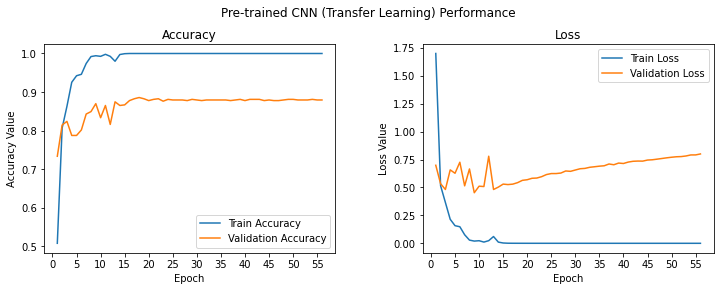

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.preprocessing import image

In [0]:
image_list = []
for filename in glob.glob('/content/drive/My Drive/Neural_Competition/PHASE-1/TestData/*.jpg'): #assuming gif
    image_list.append(filename)

In [0]:
IMG_DIM = (224, 224)
test_files = glob.glob('/content/drive/My Drive/Neural_Competition/PHASE-1/TestData/*')

In [0]:
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

In [0]:
# test_features_vgg = get_bottleneck_features(vgg_model, test_imgs_scaled)

In [0]:
# input_shape = vgg_model.output_shape[1]
# predictions = np.argmax(model.predict(test_imgs_scaled), axis=-1)
predictions = np.argmax(model.predict(validation_imgs_scaled), axis=-1)

In [74]:
print("0 = ", list(predictions).count(0))
print("1 = ", list(predictions).count(1))
print("2 = ", list(predictions).count(2))
print("3 = ", list(predictions).count(3))
print("4 = ", list(predictions).count(4))

0 =  126
1 =  102
2 =  148
3 =  121
4 =  133


In [0]:
test_files[0]

'/content/drive/My Drive/Neural_Competition/PHASE-1/TestData/020031.jpg'

In [0]:
predictedDict = {}
i = 0
for image in test_files:
  predictedDict[image.split("/")[-1].split(".")[0].strip()] = predictions[i]
  i += 1

In [73]:
predictedDict.values()

NameError: ignored

In [0]:
106, 10, 18, 16, 50

(106, 10, 18, 16, 50)

In [59]:
# define example
# predictions is a list like [ 0 1 2 4 0 2 1.....]
data = predictions
data = array(data)
print(len(data))

NameError: ignored

In [0]:


# one hot encode
encoded = to_categorical(data)
int_convert = []
for x in encoded:
  int_convert.append([int(k) for k in x])
print(int_convert)


[[0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 0, 0, 

In [0]:
import csv
csvfile = open('/content/drive/My Drive/Neural_Competition/PHASE-2/predict.csv','w', newline='')
obj1 = csv.writer(csvfile)
obj1.writerows(int_convert)
csvfile.close()
print("File Created")

File Created


In [50]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# evaluate the model
print(model.evaluate(validation_imgs_scaled, validation_labels_enc, verbose=0))
# loss, accuracy, f1_score, precision, recall = model.evaluate(validation_imgs_scaled, validation_labels_enc, verbose=0)

[0.8000801205635071, 0.879365086555481, 0.879365086555481]


In [0]:
from sklearn.metrics import classification_report, precision_recall_fscore_support


In [84]:
print(classification_report(list(one), predictions))
print(precision_recall_fscore_support(list(one), predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       118
           1       0.87      0.73      0.79       122
           2       0.87      0.91      0.89       142
           3       0.88      0.88      0.88       121
           4       0.95      0.99      0.97       127

    accuracy                           0.88       630
   macro avg       0.88      0.88      0.88       630
weighted avg       0.88      0.88      0.88       630

(array([0.82539683, 0.87254902, 0.87162162, 0.87603306, 0.94736842]), array([0.88135593, 0.7295082 , 0.9084507 , 0.87603306, 0.99212598]), array([0.85245902, 0.79464286, 0.88965517, 0.87603306, 0.96923077]), array([118, 122, 142, 121, 127]))


In [0]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [78]:
# Print f1, precision, and recall scores
print(precision_score(one, predictions , average="macro"))
print(recall_score(one, predictions , average="macro"))
print(f1_score(one, predictions , average="macro"))

0.8785937891060323
0.8774947750506523
0.8764041746064205
